# **Principal Component Analysis (PCA)**

![PCA](https://miro.medium.com/max/1400/1*QinDfRawRskupf4mU5bYSA.png)


Principal Component Analysis (PCA) is a method for dimensionality reduction and feature extraction. It is a linear transformation that transforms a set of correlated variables into a set of uncorrelated variables called principal components. The principal components are ordered in such a way that the first principal component explains the most variance in the data, the second principal component explains the second most variance, and so on.

The process of PCA is as follows:

1. **Standardization**: The data is standardized by subtracting the mean and dividing by the standard deviation for each feature. This is done to ensure that all features are on the same scale.

2. **Calculation of covariance matrix**: The covariance matrix is calculated from the standardized data. The covariance matrix is a square symmetric matrix that describes the linear relationships between the features.

3. **Eigenvalue decomposition**: The covariance matrix is then decomposed into eigenvectors and eigenvalues. The eigenvectors are the principal components and the eigenvalues are the amount of variance explained by each principal component.

4. **Component selection**: The principal components are then sorted in descending order of their eigenvalues. The top k principal components are selected, where k is the desired number of dimensions.

5. **Transformation**: The original data is then projected onto the selected principal components to obtain the lower dimensional representation of the data.

The advantages of PCA are:

* It reduces computational complexity for high-dimensional data
* It helps in removing multicollinearity
* It can help prevent overfitting by reducing model complexity

The disadvantages of PCA are:

* It assumes linear relationships between features (non-linear relationships are lost)
* The transformed features lose their original interpretability
* It may not preserve distance relationships perfectly between data points
* Information loss during dimensionality reduction

The applications of PCA are:

* Image processing and compression
* Pattern recognition in computer vision
* Gene expression analysis in bioinformatics
* Financial market analysis and risk assessment
* Signal processing and noise reduction
* Face recognition and image reconstruction

Important Considerations when using PCA:

1. **Data Preprocessing**:
   * Scale/standardize features before applying PCA
   * Handle missing values and outliers appropriately
   * Consider the nature of your features (categorical vs numerical)

2. **Selecting number of components**:
   * Use explained variance ratio (typically 80-95%)
   * Consider the scree plot
   * Balance between dimensionality reduction and information retention

3. **Interpretation**:
   * Principal components are linear combinations of original features
   * Loading vectors indicate feature importance
   * Direction of components indicates relationship between features

Common Metrics:
* Explained variance ratio
* Cumulative explained variance
* Component loadings
* Reconstruction error


---

## Data Preparation and Import
Importing necessary libraries for PCA implementation and data visualization

In [2]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

## Loading and Exploring the Dataset
Loading the diamonds dataset from seaborn which contains information about diamond characteristics.

In [3]:
# Load the diamonds dataset from seaborn
diamonds = sns.load_dataset('diamonds')

diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75



- Dataset includes features like carat, cut, color, clarity, depth, table, price, and dimensions (x, y, z)
- First few rows show various diamond attributes and their corresponding values

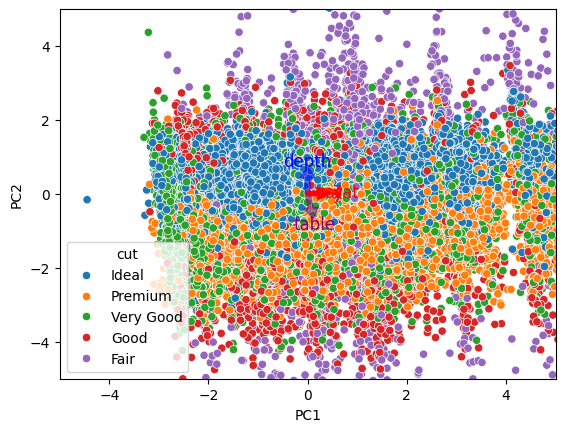

In [4]:

# Prepare the data for PCA
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z']]

# Standardize the data
X = (X - X.mean()) / X.std()

# Perform PCA with two components
pca = PCA(n_components=2)
pca.fit(X)

# Transform the data into the principal component space
X_pca = pca.transform(X)

# Add the principal components to the dataset
diamonds['PC1'] = X_pca[:, 0]
diamonds['PC2'] = X_pca[:, 1]

# Plot the data in the principal component space
sns.scatterplot(x='PC1', y='PC2', data=diamonds, hue='cut')

# Add arrows indicating the direction and strength of each original feature in the principal component space
features = pca.components_.T
for i, feature in enumerate(features):
    x, y = feature
    color = 'red' if x > 0 and y > 0 else 'green' if x < 0 and y < 0 else 'blue' if x < 0 and y > 0 else 'purple'
    plt.arrow(0, 0, x, y, color=color, alpha=0.5, width=0.1,
              head_width=0.3, head_length=0.3, length_includes_head=True)
    plt.text(x*1.2, y*1.2, X.columns[i], color=color, ha='center', va='center', fontsize=12)

# Set the axis limits
plt.xlim(-5, 5)
plt.ylim(-5, 5)

# Set the axis labels
plt.xlabel('PC1')
plt.ylabel('PC2')

# Show the plot
plt.show()


- The plot shows the data points in the principal component space, with different colors representing different diamond cuts.
- The arrows indicate the direction and strength of each original feature in the principal component space.
- The arrows are scaled to indicate the strength of the relationship between the feature and the principal components.
- The axis limits are set to a reasonable range to better visualize the data.
- The axis labels are set to 'PC1' and 'PC2' for the principal components.

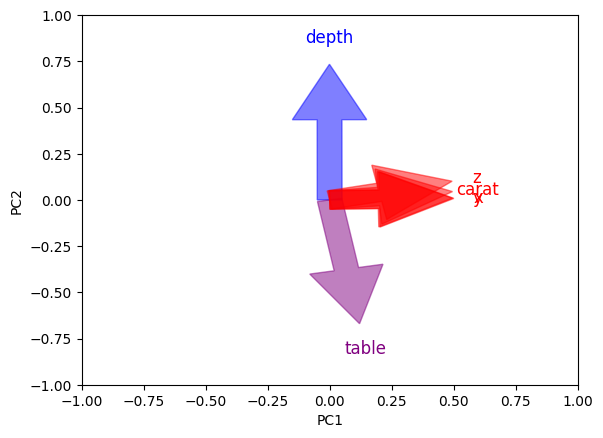

In [5]:

# Prepare the data for PCA
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z']]

# Standardize the data
X = (X - X.mean()) / X.std()

# Perform PCA with two components
pca = PCA(n_components=2)
pca.fit(X)

# Add arrows indicating the direction and strength of each original feature in the principal component space
features = pca.components_.T
for i, feature in enumerate(features):
    x, y = feature
    color = 'red' if x > 0 and y > 0 else 'green' if x < 0 and y < 0 else 'blue' if x < 0 and y > 0 else 'purple'
    plt.arrow(0, 0, x, y, color=color, alpha=0.5, width=0.1,
              head_width=0.3, head_length=0.3, length_includes_head=True)
    plt.text(x*1.2, y*1.2, X.columns[i], color=color, ha='center', va='center', fontsize=12)

# Set the axis limits
plt.xlim(-1, 1)
plt.ylim(-1, 1)

# Set the axis labels
plt.xlabel('PC1')
plt.ylabel('PC2')

# Show the plot
plt.show()


- The arrows indicate the direction and strength of each original feature in the principal component space.
- The arrows are scaled to indicate the strength of the relationship between the feature and the principal components.
- The axis labels are set to 'PC1' and 'PC2' for the principal components.

            PC1       PC2
carat  0.495367  0.045130
depth -0.000682  0.734082
table  0.120581 -0.669827
x      0.500910  0.008204
y      0.495218  0.009657
z      0.493882  0.101283


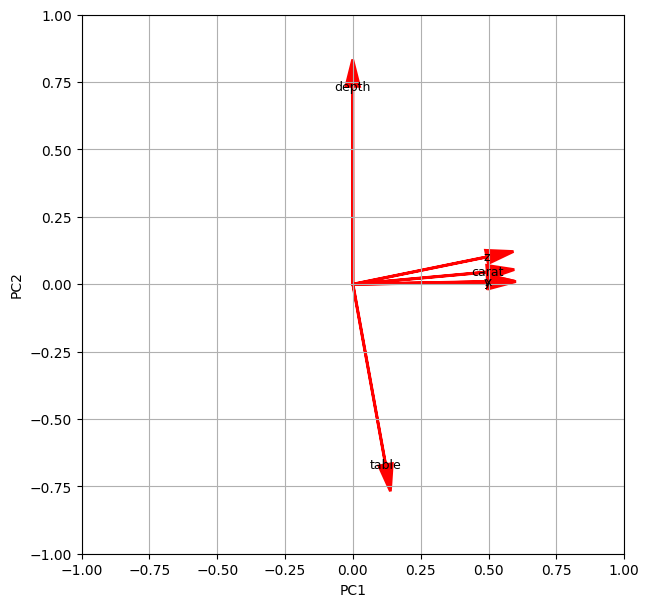

In [6]:

# Prepare the data for PCA
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z']]

# Standardize the data
X = (X - X.mean()) / X.std()

# Perform PCA with two components
pca = PCA(n_components=2)
pca.fit(X)

# Create a DataFrame to show the loadings
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=X.columns)
print(loadings)

# Add arrows indicating the direction and strength of each original feature in the principal component space
plt.figure(figsize=(7,7))
for i, v in enumerate(pca.components_.T):
    plt.arrow(0, 0, v[0], v[1], head_width=0.05, head_length=0.1, linewidth=2, fc='r', ec='r')
    plt.text(v[0], v[1], X.columns[i], color='black', ha='center', va='center', fontsize=9)

# Set the axis limits
plt.xlim(-1, 1)
plt.ylim(-1, 1)

# Set the axis labels
plt.xlabel('PC1')
plt.ylabel('PC2')

# Show the plot
plt.grid()
plt.show()

            PC1       PC2       PC3       PC4       PC5       PC6
carat  0.495367  0.045130 -0.027908  0.789965 -0.160215 -0.319502
depth -0.000682  0.734082  0.671001 -0.014030 -0.088358  0.053638
table  0.120581 -0.669827  0.732523 -0.013456 -0.002961 -0.003431
x      0.500910  0.008204 -0.069979  0.040759  0.048632  0.860290
y      0.495218  0.009657 -0.086227 -0.537622 -0.635140 -0.234074
z      0.493882  0.101283  0.007509 -0.291338  0.748831 -0.316450


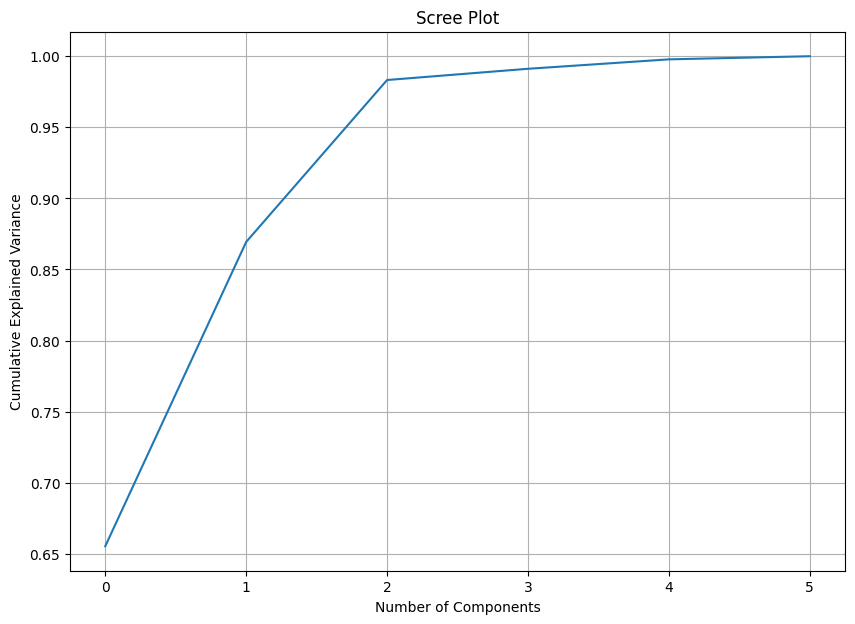

In [7]:

# Prepare the data for PCA
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z']]

# Standardize the data
X = (X - X.mean()) / X.std()

# Perform PCA with all components
pca = PCA()
pca.fit(X)

# Create a DataFrame to show the loadings
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=X.columns)
print(loadings)

# Plot the explained variance (Scree Plot)
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.show()



- The loadings show the direction and strength of each original feature in the principal component space.
- The scree plot shows the cumulative explained variance as a function of the number of components and helps to determine the number of components to include in the model.

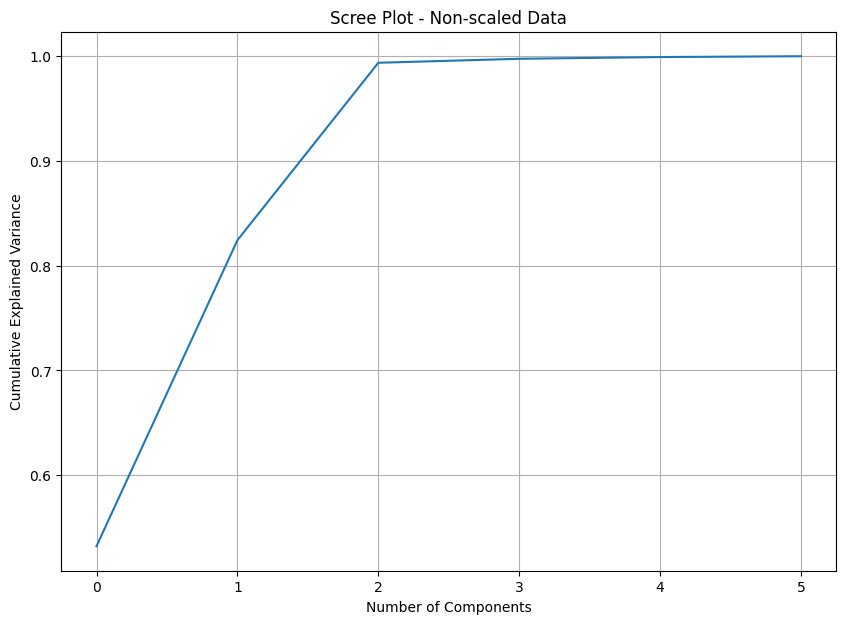

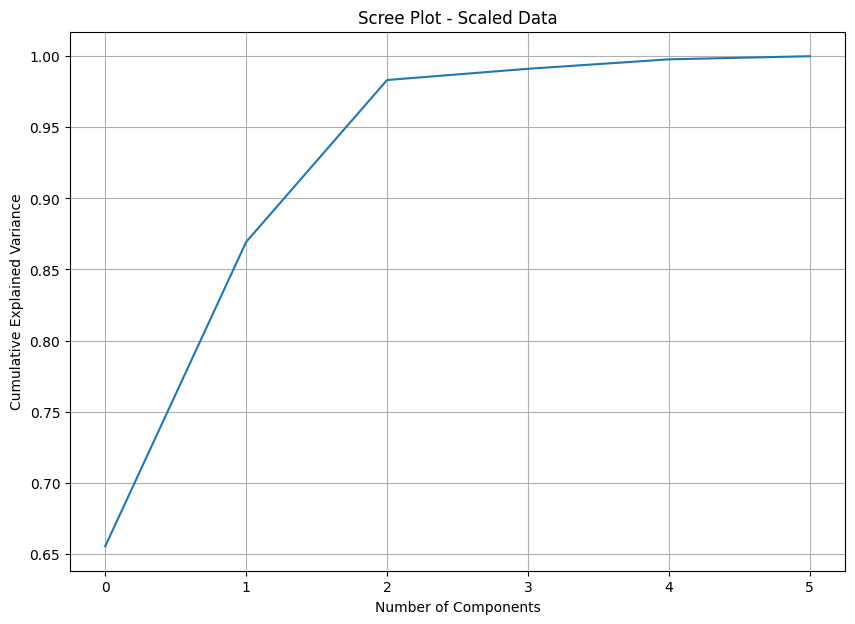

In [8]:

# Load the diamonds dataset from seaborn
diamonds = sns.load_dataset('diamonds')

# Prepare the data for PCA
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z']]

# Perform PCA on non-scaled data
pca_non_scaled = PCA()
pca_non_scaled.fit(X)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA on scaled data
pca_scaled = PCA()
pca_scaled.fit(X_scaled)

# Plot the explained variance (Scree Plot) for non-scaled data
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca_non_scaled.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot - Non-scaled Data')
plt.grid(True)
plt.show()

# Plot the explained variance (Scree Plot) for scaled data
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca_scaled.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot - Scaled Data')
plt.grid(True)
plt.show()

# **Conclusion**:

In this notebook, we have applied Principal Component Analysis (PCA) to the diamonds dataset. We have seen how PCA can be used to reduce the dimensionality of a dataset and to visualize high-dimensional data. We have also seen how PCA can be used to identify patterns in the data and to identify clusters of similar points.


---


# **SVD**

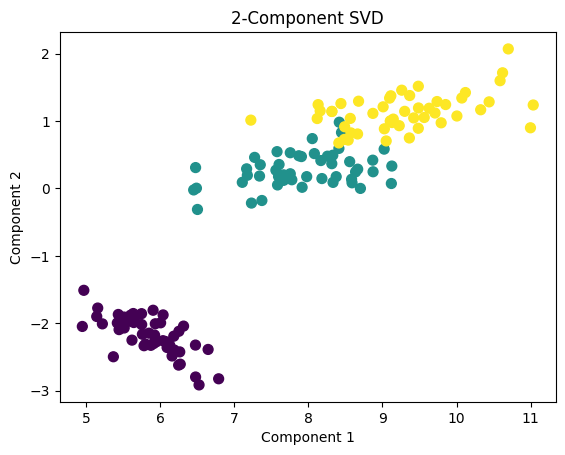

In [1]:
# import necessary libraries
from sklearn.decomposition import TruncatedSVD
from sklearn import datasets
import matplotlib.pyplot as plt

# load iris dataset as an example
iris = datasets.load_iris()
X = iris.data
y = iris.target

# SVD represent documents and terms in vectors 
svd = TruncatedSVD(n_components=2, algorithm='randomized', n_iter=100, random_state=122)
X_svd = svd.fit_transform(X)

# plot the result
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=y, s=50, cmap='viridis')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2-Component SVD')
plt.show()